In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec


df = pd.read_csv('../resource/Mental-Health-Twitter-Tokenized.csv')

In [11]:
df['processed_tokens']

0        ['year', 'since', 'diagnose', 'today', 'take',...
1        ['sunday', 'need', 'break', 'plan', 'spend', '...
2        ['awake', 'tire', 'need', 'sleep', 'brain', 'i...
3        ['bear', 'make', 'perfect', 'gift', 'great', '...
4        ['hard', 'say', 'whether', 'pack', 'list', 'ma...
                               ...                        
19761      ['day', 'without', 'sunshine', 'like', 'night']
19762    ['borens', 'law', 'charge', 'ponder', 'trouble...
19763    ['flow', 'chart', 'thoroughly', 'oversold', 'p...
19764    ['ship', 'safe', 'harbor', 'never', 'mean', 's...
19765           ['black', 'hole', 'god', 'divide', 'zero']
Name: processed_tokens, Length: 19766, dtype: object

In [3]:
import ast

# Fix the stringified lists
df['processed_tokens'] = df['processed_tokens'].apply(ast.literal_eval)

# Now it will be List[List[str]]
tokenized_texts = df['processed_tokens'].tolist()

# Re-train Word2Vec
from gensim.models import Word2Vec

w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=2, workers=4)
print(w2v_model.wv.index_to_key[:50])  # Check top 50 words

['face', 'get', 'like', 'go', 'depression', 'one', 'know', 'say', 'love', 'time', 'make', 'want', 'people', 'think', 'would', 'good', 'heart', 'amp', 'tear', 'need', 'day', 'joy', 'follow', 'see', 'new', 'look', 'year', 'thank', 'take', 'fuck', 'trump', 'u', 'feel', 'much', 'life', 'thing', 'treatment', 'well', 'oh', 'work', 'never', 'smile', 'god', 'twitter', 'help', 'way', 'laugh', 'still', 'come', 'really']


In [4]:
w2v_model.wv.index_to_key

['face',
 'get',
 'like',
 'go',
 'depression',
 'one',
 'know',
 'say',
 'love',
 'time',
 'make',
 'want',
 'people',
 'think',
 'would',
 'good',
 'heart',
 'amp',
 'tear',
 'need',
 'day',
 'joy',
 'follow',
 'see',
 'new',
 'look',
 'year',
 'thank',
 'take',
 'fuck',
 'trump',
 'u',
 'feel',
 'much',
 'life',
 'thing',
 'treatment',
 'well',
 'oh',
 'work',
 'never',
 'smile',
 'god',
 'twitter',
 'help',
 'way',
 'laugh',
 'still',
 'come',
 'really',
 'right',
 'real',
 'let',
 'friend',
 'today',
 'back',
 'talk',
 'man',
 'even',
 'try',
 'via',
 'yong',
 'best',
 'tell',
 'cry',
 'please',
 'eye',
 'could',
 'red',
 'happy',
 'hand',
 'start',
 'watch',
 'thanks',
 'stop',
 'someone',
 'hey',
 'overcome',
 'ever',
 'loud',
 'great',
 'tweet',
 'give',
 'shit',
 'guy',
 'find',
 'hello',
 'bad',
 'first',
 'use',
 'actually',
 'always',
 'wait',
 'game',
 'girl',
 'russia',
 'ask',
 'sleep',
 'live',
 'play',
 'last',
 'something',
 'show',
 'skin',
 'keep',
 'person',
 'call

In [5]:
# Example: get vector for a single word
print(w2v_model.wv['happy'])  # returns 100-dim vector

[-0.42671555  0.4465021   0.3199772  -0.21111402  0.34552547 -0.5534107
  0.00282119  1.2249011  -0.67737114 -0.17169206 -0.11524326 -0.4356512
 -0.10248707  0.13153884  0.1344833  -0.00732202 -0.01549364 -0.38195968
 -0.17253526 -1.2135999   0.4168253   0.4011024  -0.08097483 -0.15363076
 -0.24802862  0.3691197  -0.15928134 -0.31366107 -0.76017046 -0.16172044
  0.33932808  0.05014186 -0.10450306 -0.39230886 -0.14931098  0.6292935
  0.09071171 -0.14813001 -0.29498208 -0.89006436  0.10633914 -0.21542072
 -0.2710766  -0.02518634  0.608139   -0.42453158 -0.03891846 -0.06674327
 -0.02520174  0.24237543  0.09168389 -0.22009547  0.14877628 -0.0368059
 -0.04547235 -0.12473389 -0.08035711 -0.30747193 -0.43547568 -0.30630055
  0.41824204  0.18059537 -0.00636159 -0.2846308  -0.17372757  0.22356628
  0.29505223  0.36832604 -0.63573027  0.755704    0.11214633  0.4653515
  0.38158906 -0.13310869  0.9332364   0.30706394 -0.09679782  0.15597142
 -0.08190289 -0.3005056  -0.17980303 -0.04944692 -0.5652

In [6]:
# Convert each tweet into an average of word vectors
import numpy as np

def get_avg_vector(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(w2v_model.vector_size)

df['w2v_vector'] = df['tokens'].apply(get_avg_vector)

# Create a final matrix
w2v_matrix = np.vstack(df['w2v_vector'].values)

In [7]:
w2v_matrix

array([[-0.18716525,  0.26555544,  0.14499372, ..., -0.23821336,
         0.12637445,  0.07287814],
       [-0.19570038,  0.27400681,  0.15317212, ..., -0.248556  ,
         0.13130686,  0.07667137],
       [-0.20618723,  0.28515235,  0.15846425, ..., -0.26050934,
         0.13466708,  0.07425085],
       ...,
       [-0.18539208,  0.26003572,  0.1413895 , ..., -0.23487234,
         0.12274303,  0.07096871],
       [-0.18525496,  0.26313588,  0.1430466 , ..., -0.23910728,
         0.12595452,  0.07080267],
       [-0.20508121,  0.29255864,  0.15556417, ..., -0.26378915,
         0.13881347,  0.08359215]])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = w2v_matrix
y = df['label']  # Replace with your actual label column

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.48      0.51      1989
           1       0.53      0.59      0.56      1965

    accuracy                           0.54      3954
   macro avg       0.54      0.54      0.54      3954
weighted avg       0.54      0.54      0.54      3954



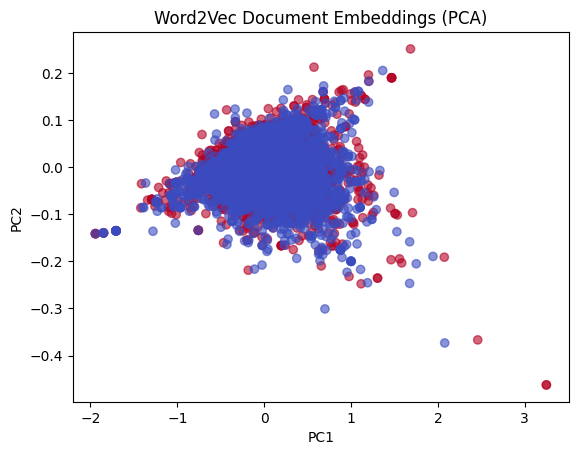

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(w2v_matrix)

plt.scatter(reduced[:, 0], reduced[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("Word2Vec Document Embeddings (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()